In [3]:
import math
import numpy as np
import copy
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random 
## Constante
OFFSET = 0.2





class State:
    """ Etat generique d'un jeu de plateau. Le plateau est represente par une matrice de taille NX,NY,
    le joueur courant par 1 ou -1. Une case a 0 correspond a une case libre.
    * next(self,coup) : fait jouer le joueur courant le coup.
    * get_actions(self) : renvoie les coups possibles
    * win(self) : rend 1 si le joueur 1 a gagne, -1 si le joueur 2 a gagne, 0 sinon
    * stop(self) : rend vrai si le jeu est fini.
    * fonction de hashage : renvoie un couple (matrice applatie des cases, joueur courant).
    """
    NX,NY = None,None
    def __init__(self,grid=None,courant=None):
        self.grid = copy.deepcopy(grid) if grid is not None else np.zeros((self.NX,self.NY),dtype="int")
        self.courant = courant or 1
    def next(self,coup):
        pass
    def get_actions(self):	
	
        pass
    def win(self):
        pass
    def stop(self):
        pass
    @classmethod
    def fromHash(cls,hash):
        return cls(np.array([int(i)-1 for i in list(hash[0])],dtype="int").reshape((cls.NX,cls.NY)),hash[1])
    def hash(self):
        return ("".join(str(x+1) for x in self.grid.flat),self.courant)
            











class Jeu:
    """ Jeu generique, qui prend un etat initial et deux joueurs.
        run(self,draw,pause): permet de joueur une partie, avec ou sans affichage, avec une pause entre chaque coup. 
                Rend le joueur qui a gagne et log de la partie a la fin.
        replay(self,log): permet de rejouer un log
    """
    def __init__(self,init_state = None,j1=None,j2=None):
        self.joueurs = {1:j1,-1:j2}
        self.state = copy.deepcopy(init_state)
        self.log = None
    def run(self,draw=False,pause=0.5):
        log = []
        if draw:
            self.init_graph()
        while not self.state.stop():
            coup = self.joueurs[self.state.courant].get_action(self.state)
            log.append((self.state,coup))
            self.state = self.state.next(coup)
            if draw:
                self.draw(self.state.courant*-1,coup)
                plt.pause(pause)
        return self.state.win(),log
    def init_graph(self):
        self._dx,self._dy  = 1./self.state.NX,1./self.state.NY
        self.fig, self.ax = plt.subplots()
        for i in range(self.state.grid.shape[0]):
            for j in range(self.state.grid.shape[1]):
                self.ax.add_patch(patches.Rectangle((i*self._dx,j*self._dy),self._dx,self._dy,\
                        linewidth=1,fill=False,color="black"))
        plt.show(block=False)
    def draw(self,joueur,coup):
        color = "red" if joueur>0 else "blue"
        self.ax.add_patch(patches.Rectangle(((coup[0]+OFFSET)*self._dx,(coup[1]+OFFSET)*self._dy),\
                        self._dx*(1-2*OFFSET),self._dy*(1-2*OFFSET),linewidth=1,fill=True,color=color))
        plt.draw()
    def replay(self,log,pause=0.5):
        self.init_graph()
        for state,coup in log:
            self.draw(state.courant,coup)
            plt.pause(pause)













class MorpionState(State):
    """ Implementation d'un etat du jeu du Morpion. Grille de 3X3. 
    """
    NX,NY = 3,3
    def __init__(self,grid=None,courant=None):
        super(MorpionState,self).__init__(grid,courant)
    def next(self,coup):
        state =  MorpionState(self.grid,self.courant)
        state.grid[coup]=self.courant
        state.courant *=-1
        return state
    def get_actions(self):
        return list(zip(*np.where(self.grid==0)))
    def win(self):
        for i in [-1,1]:
            if ((i*self.grid.sum(0))).max()==3 or ((i*self.grid.sum(1))).max()==3 or ((i*self.grid)).trace().max()==3 or ((i*np.fliplr(self.grid))).trace().max()==3: return i
        return 0
    def stop(self):
        return self.win()!=0 or (self.grid==0).sum()==0
    def __repr__(self):
        return str(self.hash())

class Agent:
    """ Classe d'agent generique. Necessite une methode get_action qui renvoie l'action correspondant a l'etat du jeu state"""
    def __init__(self):
        pass
    def get_action(self,state):
		
        pass


In [4]:

class Agent_aleatoire(Agent):
	
    """ Classe d'agent aleatoire. Necessite une methode get_action qui renvoie l'action correspondant a l'etat du jeu state"""
    def __init__(self):
        pass
    def get_action(self,state):
    	liste = state.get_actions()
    	return liste[random.randint(0, len(liste)-1)]

0.5771543086172345


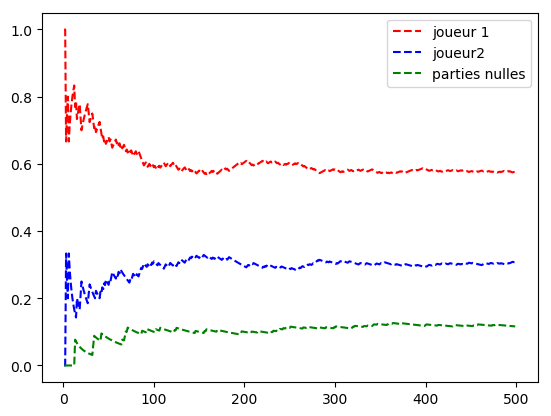

In [49]:
joueur1 = Agent_aleatoire()
joueur2 = Agent_aleatoire()
somme1 =0
somme2= 0
moy1= []
moy2  = []
nulles= []
T = 500
tours=range(1, T)
for i in range(1 ,T):
    Morpion = MorpionState()
    jeu = Jeu(Morpion, joueur1, joueur2)
    x = jeu.run(False, 0.5)
    
    if(x[0] == 1):
        somme1 += 1 
    elif(x[0] == -1):
        somme2 += 1 
    moy1.append(float(somme1)/i)
    moy2.append(float(somme2)/i)
    nulles.append(float(i-somme1-somme2)/i)
print(moy1[-1])
plt.plot(tours, moy1, 'r--',tours, moy2, 'b--', tours, nulles, 'g--')
plt.legend(["joueur 1", "joueur2", "parties nulles"])

*** loi de bernoulli de parametre p= 0.6***
*** variance = 0.24***

In [31]:

class Agent_Monte_carlo(Agent):
	
    """ Classe d'agent aleatoire. Necessite une methode get_action qui renvoie l'action correspondant a l'etat du jeu state"""
    def __init__(self):
        pass
    def get_action(self,state):
        liste = state.get_actions()
        a = []
        P= 2
        joueur1 = Agent_aleatoire()
        joueur2 = Agent_aleatoire()
        for i in liste:
            somme = 0
            for j in range(P):
                jeu = Jeu(state.next(i), joueur1, joueur2)
                x = jeu.run(False, 0.5)
                if(x[0] == state.courant):
                    somme += 1
            a.append(float(somme)/P)
        return liste[np.argmax(a)]

        

In [6]:
joueur1 = Agent_Monte_carlo()
joueur2 = Agent_Monte_carlo()
somme1 =0
somme2= 0
moy1= []
moy2  = []
nulles= []
T = 500

tours=range(1, T)
for i in range(1 ,T):
    Morpion = MorpionState()
    jeu = Jeu(Morpion, joueur1, joueur2)
    x = jeu.run(False, 0.5)

    if(x[0] == 1):
        somme1 += 1 
    elif(x[0] == -1):
        somme2 += 1 
    moy1.append(float(somme1)/i)
    moy2.append(float(somme2)/i)
    nulles.append(float(i-somme1-somme2)/i)


KeyboardInterrupt: 

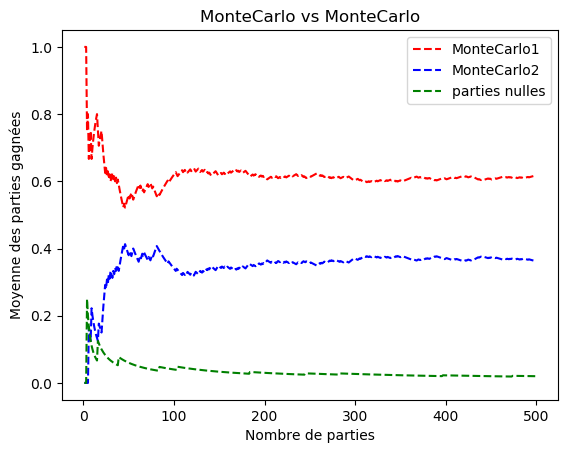

In [138]:
plt.plot(tours, moy1, 'r--',tours, moy2, 'b--', tours, nulles, 'g--')
plt.rcdefaults()
plt.xlabel("Nombre de parties")
plt.ylabel("Moyenne des parties gagnées")
plt.title("MonteCarlo vs MonteCarlo")
plt.legend(["MonteCarlo1", "MonteCarlo2", "parties nulles"])
plt.show()

***UCT***

**arbre**

In [10]:
class Node(object):
    def __init__(self, state, Wins=0, Tries=0,parent= None):
        self.Wins = Wins
        self.Tries = Tries
        self.state = state
        self.actions = state.get_actions()
        self.parent= parent
        self.children = []

    def addChild(self, obj):
        self.children.append(obj)
    def numChildren(self):
        return len(self.children)
    def numActions(self):
        return len(this.actions)
    def getChild(self, index):
        return self.children[index]
    def hasChildren(self):
        return len(self.children) >0
    def hasUnsimulatedActions(self):
        return True if ( len(self.actions) - len(self.children) ) >0  else False
    def getAction(self, index):
        return self.actions[index]
    def print(self):
        if(self.numChildren() == 0):
            print(" courant " + str(self.state.courant) + " gagnees" + str(self.Wins) + "jouees" +str(self.Tries))
            
        else:
            for i in self.children:
                i.print()
    def printOne(self):
        print(" courant " + str(self.state.courant) + " gagnees" + str(self.Wins) + "jouees" +str(self.Tries))
    

**selection**

In [11]:
def selection(racine, t, facteur):
    
    liste_essaie, liste_moy_reussites = [],[]
    for i in racine.children:
        liste_essaie.append(i.Tries)
        liste_moy_reussites.append(float(i.Wins)/(i.Tries))
    liste = np.asarray(liste_essaie) + facteur * np.sqrt(2*math.log(t)/np.asarray(liste_moy_reussites))
    p = np.argmax(liste)
    prochain = racine.getChild(p)
    if(prochain.hasChildren() ):
        if(prochain.hasUnsimulatedActions()):
            
            return prochain
        else:
            
            return selection(prochain, t, facteur)
    else:
        
        return prochain
    

**expansion**

In [12]:
def expansion(racine):
    if(racine.hasUnsimulatedActions()):
        s = racine.state.next(racine.getAction(racine.numChildren()))
        node = Node(s, 0, 0, racine)
        racine.addChild(node)
        return node
    else:
        return None
        

 **Simulation** : à partir d’un nœud à simuler, un jeu entre deux joueurs aléatoires est
déroulé jusqu’à atteindre un état final (victoire, défaite ou match nul). Les états visités
lors de la simulation ne sont pas ajoutés à l’arbre, ils ne sont pas stockés.

In [13]:
def simulation(racine):
    joueur1 = Agent_aleatoire()
    joueur2 = Agent_aleatoire()
    jeu = Jeu(racine.state, joueur1, joueur2)
    x = jeu.run(False, 0.1)
    if(x[0] == racine.state.courant):
        return 1
    elif(x[0] == racine.state.courant *-1):
        return -1
    else:
        return 0
    

**On rétro-propage** le résultat de la simulation à tout le chemin menant au fils simulé :
pour chaque nœud sur le chemin, on met à jour en fonction du résultat le nombre de
victoires et le nombre de visites.

In [14]:
def retropropagation(racine, resultat):
    while(racine != None):
        if(resultat == 1):
            racine.Wins +=1
        racine.Tries+=1
        racine= racine.parent
        resultat *= -1
    
    

**agent uct**

In [26]:
class Agent_UCT(Agent):
	
    """ Classe d'agent aleatoire. Necessite une methode get_action qui renvoie l'action correspondant a l'etat du jeu state"""
    def __init__(self, facteur):
        self.f = facteur
        pass
    def get_action(self,state):
        #creation de la racine
        racine = Node(state, 0,0, None)
        actions = racine.actions
        for i in actions:
            n = expansion(racine)
            if(n != None):
                resultat = simulation(n)
                #print("resultat" + str(resultat))
                retropropagation(n, resultat)
        
        #racine.print()
        P= 20
        for j in range(1, P):
            n = selection(racine, j, self.f)
            node = expansion(n)
            if(node != None):
                
                resultat = simulation(node)
                retropropagation(node, resultat)
            #print("afichage ===================================")
            #racine.print()
        
        # calculer le meilleur choix apres les iterations de UCT
        a=[]
        for i in racine.children:
            a.append(float(i.Wins)/i.Tries)
        #print("a" + str(a))
        return racine.getAction(np.argmin(a))

 

In [ ]:
joueur1 = Agent_Monte_carlo()
joueur2 = Agent_UCT()
Morpion = MorpionState()
jeu = Jeu(Morpion, joueur2, joueur1)
#joueur1.get_action(Morpion)
x = jeu.run(False, 0.5)
print(x)

In [146]:
print(x)


(1, [(('111111111', 1), (2, 2)), (('111111112', -1), (0, 0)), (('011111112', 1), (0, 2)), (('012111112', -1), (0, 1)), (('002111112', 1), (1, 2))])


In [35]:
#tester sur le facteur de 
c = []
moy= []
joueur1 = Agent_Monte_carlo()
for o in range(1, 10):
    
    somme2= 0
    moy2  = []
    T =50
    joueur2 = Agent_UCT(float(o)/10)
    c.append(float(o)/10)
    moy1= []
    tours=range(1, T)
    for i in range(1 ,T):
        Morpion = MorpionState()
        jeu = Jeu(Morpion, joueur2, joueur1 )
        x = jeu.run(False, 0.5) 
        if(x[0] == 1):
            somme2 += 1 
        moy2.append(float(somme2)/i)
    moy.append(moy2[-1])


c:\users\asus\appdata\local\programs\python\python35-32\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
c:\users\asus\appdata\local\programs\python\python35-32\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


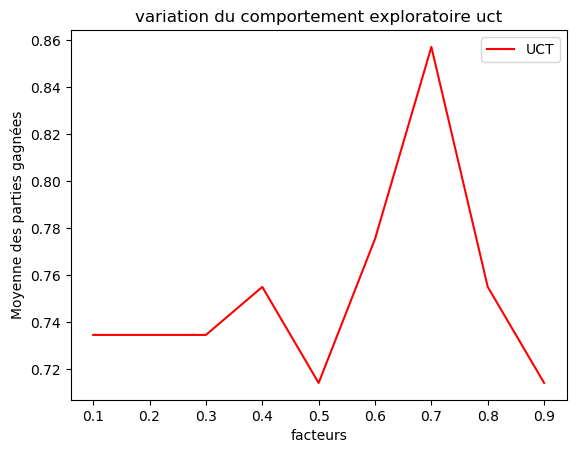

In [36]:
plt.plot(c, moy, 'r')
plt.rcdefaults()
plt.xlabel("facteurs")
plt.ylabel("Moyenne des parties gagnées")
plt.title("variation du comportement exploratoire uct")
plt.legend([ "UCT"])
plt.show()